# Analysis of Palmer Penguins Dataset
- Thực hiện: Nguyễn Văn Khánh

This notebook analyzes the Palmer Penguins dataset using decision trees to predict penguin species based on physical characteristics.

## Objectives:
1. Load and preprocess the dataset
2. Split data into multiple train/test sets with different ratios
3. Visualize class distributions
4. Train decision tree models
5. Evaluate model performance
6. Analyze the effect of tree depth on accuracy

## Setup and Imports

In [3]:
# Import necessary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Check if scikit-learn and other required packages are installed
try:
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer
    print("sklearn.impute.IterativeImputer is available.")
except ImportError as e:
    print(f"WARNING: {str(e)}")
    print("Installing required packages...")
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "scikit-learn>=1.0"])
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer
    print("Successfully installed and imported IterativeImputer.")

# Import custom modules
# Add parent directory to path to ensure imports work
current_dir = os.path.dirname(os.path.abspath('__file__'))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)
print(f"Added to sys.path: {parent_dir}")

try:
    from src.preprocessing import load_and_preprocess
    from src.split_data import create_splits
    from src.tree_utils import train_decision_tree, evaluate_model, analyze_tree_depth, visualize_tree
    print("Successfully imported custom modules.")
except ImportError as e:
    print(f"Error importing custom modules: {str(e)}")
    print("Current sys.path:")
    for p in sys.path:
        print(f"  - {p}")
    raise

# Create output directories if they don't exist
os.makedirs("../visualizations/palmer_penguins", exist_ok=True)
os.makedirs("../results/accuracy_tables", exist_ok=True)
os.makedirs("../results/classification_reports", exist_ok=True)
os.makedirs("../results/confusion_matrices", exist_ok=True)
print("Created output directories.")

sklearn.impute.IterativeImputer is available.
Added to sys.path: d:\Đại Học\Kì 2 - Năm 3\Cơ Sở AI\Đồ Án Thực Hành\Decision-Tree\AI-Decision-Tree
Successfully imported custom modules.
Created output directories.


## Step 1: Load and Preprocess Data

In [4]:
# Load and preprocess the data
import os

# Đường dẫn tuyệt đối và tương đối để thử
absolute_data_path = os.path.abspath("../datasets/palmer_penguins/penguins.csv")
relative_data_path = "../datasets/palmer_penguins/penguins.csv"
data_path = relative_data_path if os.path.exists(relative_data_path) else absolute_data_path

# Kiểm tra tồn tại của file
if not os.path.exists(data_path):
    print(f"ERROR: File không tồn tại: {data_path}")
    print(f"Thư mục hiện tại: {os.getcwd()}")
    print("Kiểm tra các thư mục:")
    for root, dirs, files in os.walk(".."):
        print(f"Thư mục: {root}")
        for file in files:
            if "penguin" in file.lower():
                print(f"  - {file}")
else:
    print(f"File tồn tại: {data_path}")
    
try:
    # Thử đọc file raw trước khi xử lý
    import pandas as pd
    raw_data = pd.read_csv(data_path)
    print("\nDữ liệu thô (5 dòng đầu):")
    print(raw_data.head())
    print("\nThông tin về dữ liệu thô:")
    print(f"Số dòng: {raw_data.shape[0]}, Số cột: {raw_data.shape[1]}")
    print("Các cột:", raw_data.columns.tolist())
    print("\nKiểm tra giá trị thiếu:")
    print(raw_data.isnull().sum())
    
    # Gọi hàm load_and_preprocess
    print("\n--- Bắt đầu tiền xử lý dữ liệu ---")
    X, y = load_and_preprocess(data_path)

    # Display the first few rows of processed features
    print("\nProcessed features:")
    print(X.head())

    # Display target distribution
    print("\nTarget distribution:")
    print(y.value_counts())

    # Add imbalance ratio
    print(f"\nClass imbalance ratio: {y.value_counts().max()}/{y.value_counts().min()} = {y.value_counts().max()/y.value_counts().min():.2f}")
    
except Exception as e:
    print(f"ERROR: Có lỗi khi đọc hoặc xử lý file: {e}")
    import traceback
    traceback.print_exc()

File tồn tại: ../datasets/palmer_penguins/penguins.csv

Dữ liệu thô (5 dòng đầu):
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  

Thông tin về dữ liệu thô:
Số dòng: 344, Số cột: 8
Các cột: ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'year']

Kiểm tra giá trị thiếu:
species               0
island                0
bill_length_mm        2
bill_depth_mm         

d:\Đại Học\Kì 2 - Năm 3\Cơ Sở AI\Đồ Án Thực Hành\Decision-Tree\AI-Decision-Tree\notebooks\..\src\preprocessing.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].fillna(df['sex'].mode()[0], inplace=True)


## Step 2: Create Multiple Train/Test Splits

In [5]:
# Create multiple train/test splits
splits = create_splits(X, y)
split_ratios = ["40-60", "60-40", "80-20", "90-10"]

print(f"Created {len(splits)} different train/test splits with ratios: {', '.join(split_ratios)}")

# Display the size of each split
for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    print(f"Split {i+1} ({split_ratios[i]}):\n")
    print(f"  Training set: {X_train.shape[0]} samples")
    print(f"  Test set: {X_test.shape[0]} samples\n")

Created 4 different train/test splits with ratios: 40-60, 60-40, 80-20, 90-10
Split 1 (40-60):

  Training set: 137 samples
  Test set: 207 samples

Split 2 (60-40):

  Training set: 206 samples
  Test set: 138 samples

Split 3 (80-20):

  Training set: 275 samples
  Test set: 69 samples

Split 4 (90-10):

  Training set: 309 samples
  Test set: 35 samples



## Step 3: Visualize Class Distribution in Each Split

In [6]:
def plot_class_distribution(y_train, y_test, split_id, split_ratio):
    """Plot the class distribution in train and test sets"""
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    # Train set distribution
    sns.countplot(x=y_train, ax=axs[0], palette="viridis")
    axs[0].set_title(f"Training Set ({split_ratio} Split)")
    axs[0].set_xlabel("Penguin Species")
    axs[0].set_ylabel("Count")
    
    # Test set distribution
    sns.countplot(x=y_test, ax=axs[1], palette="viridis")
    axs[1].set_title(f"Test Set ({split_ratio} Split)")
    axs[1].set_xlabel("Penguin Species")
    axs[1].set_ylabel("Count")
    
    plt.tight_layout()
    
    # Ensure directory exists
    os.makedirs("../visualizations/palmer_penguins", exist_ok=True)
    
    save_path = f"../visualizations/palmer_penguins/class_distribution_split_{split_id+1}.png"
    plt.savefig(save_path)
    print(f"Saved class distribution plot to {save_path}")
    return fig

C:\Users\khanh\AppData\Local\Temp\ipykernel_8620\2625201507.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axs[0], palette="viridis")
C:\Users\khanh\AppData\Local\Temp\ipykernel_8620\2625201507.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, ax=axs[1], palette="viridis")


Saved class distribution plot to ../visualizations/palmer_penguins/class_distribution_split_1.png


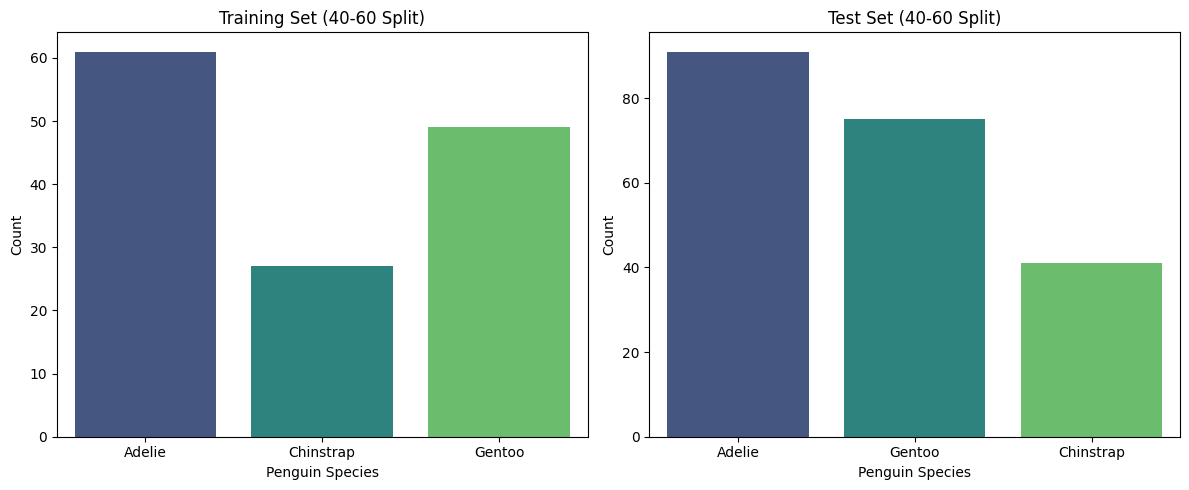

C:\Users\khanh\AppData\Local\Temp\ipykernel_8620\2625201507.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axs[0], palette="viridis")
C:\Users\khanh\AppData\Local\Temp\ipykernel_8620\2625201507.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, ax=axs[1], palette="viridis")


Saved class distribution plot to ../visualizations/palmer_penguins/class_distribution_split_2.png


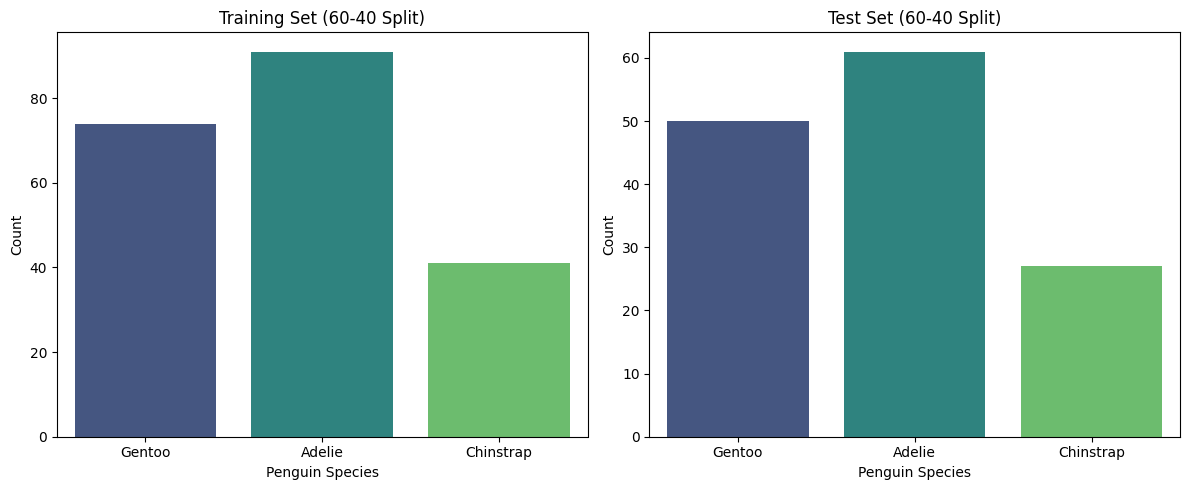

C:\Users\khanh\AppData\Local\Temp\ipykernel_8620\2625201507.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axs[0], palette="viridis")
C:\Users\khanh\AppData\Local\Temp\ipykernel_8620\2625201507.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, ax=axs[1], palette="viridis")


Saved class distribution plot to ../visualizations/palmer_penguins/class_distribution_split_3.png


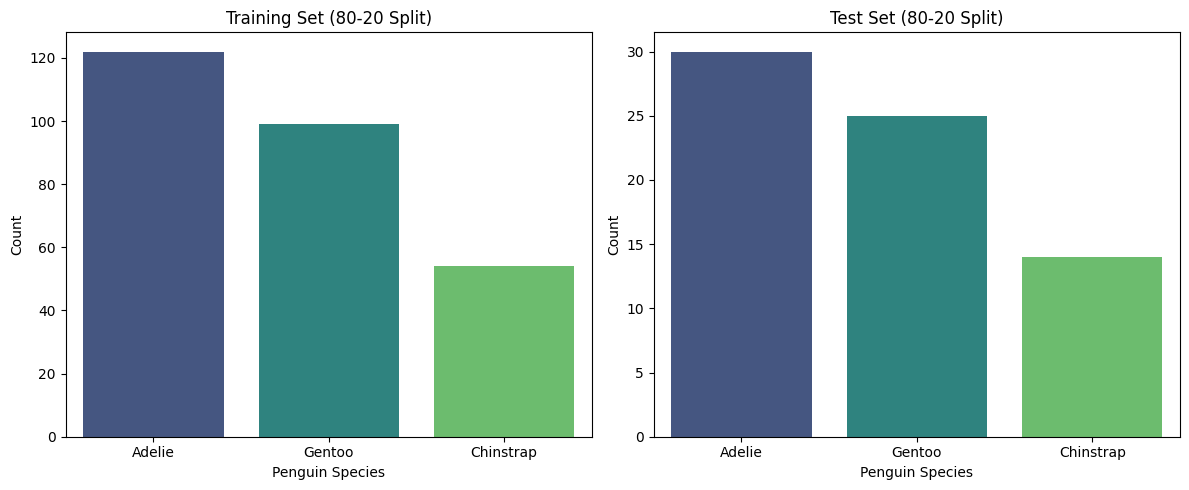

C:\Users\khanh\AppData\Local\Temp\ipykernel_8620\2625201507.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axs[0], palette="viridis")
C:\Users\khanh\AppData\Local\Temp\ipykernel_8620\2625201507.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, ax=axs[1], palette="viridis")


Saved class distribution plot to ../visualizations/palmer_penguins/class_distribution_split_4.png


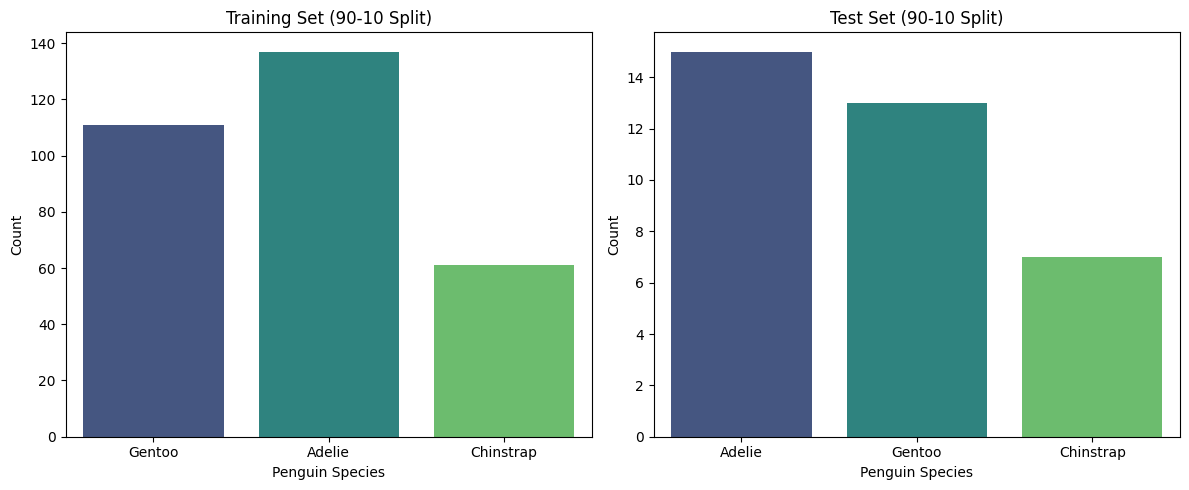

In [7]:
# Plot class distribution for each split
for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    fig = plot_class_distribution(y_train, y_test, i, split_ratios[i])
    plt.show()

## Step 4: Train Decision Tree Models

In [8]:
# Train decision trees for each split
models = []

for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    print(f"Training model on split {i+1} ({split_ratios[i]})...")
    model = train_decision_tree(X_train, y_train)
    models.append(model)
    print(f"Model trained with {model.tree_.node_count} nodes")

Training model on split 1 (40-60)...
Model trained with 13 nodes
Training model on split 2 (60-40)...
Model trained with 17 nodes
Training model on split 3 (80-20)...
Model trained with 25 nodes
Training model on split 4 (90-10)...
Model trained with 25 nodes


## Step 5: Evaluate Models


Evaluating model trained on split 1 (40-60):
Test Accuracy: 0.9517


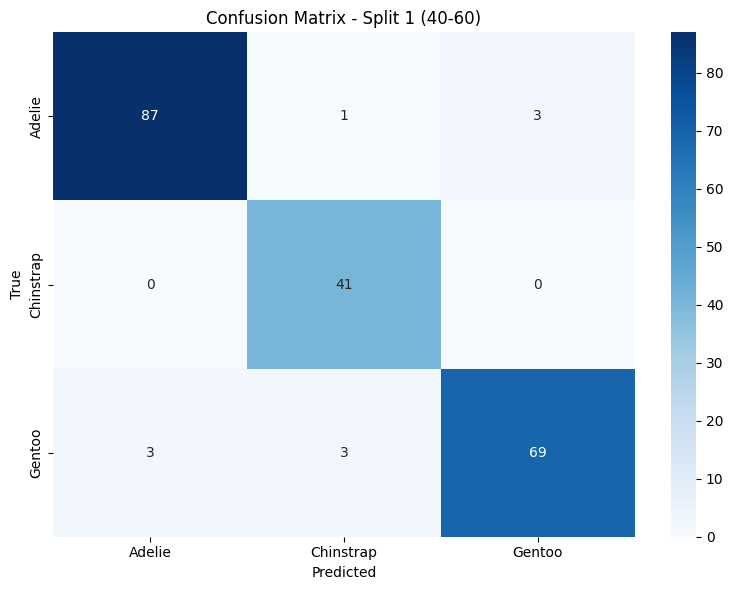


Classification Report:
              precision    recall  f1-score   support

      Adelie       0.97      0.96      0.96        91
   Chinstrap       0.91      1.00      0.95        41
      Gentoo       0.96      0.92      0.94        75

    accuracy                           0.95       207
   macro avg       0.95      0.96      0.95       207
weighted avg       0.95      0.95      0.95       207


Evaluating model trained on split 2 (60-40):
Test Accuracy: 0.9783


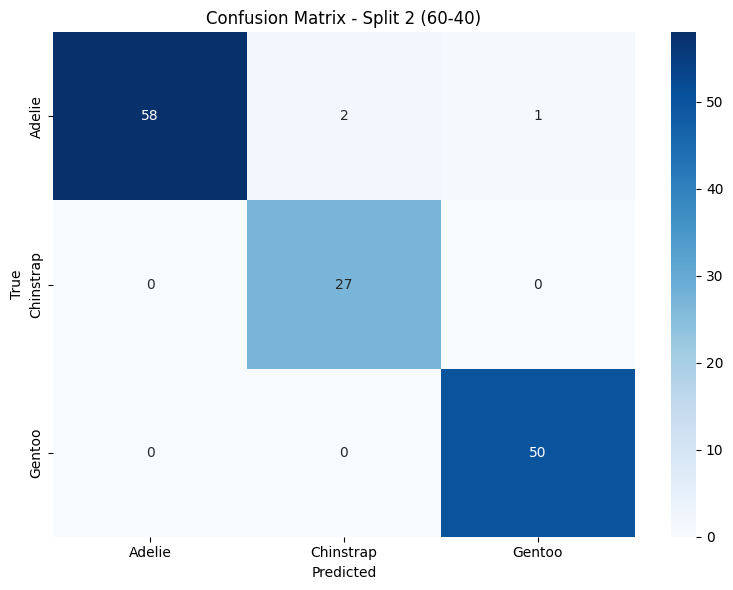


Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      0.95      0.97        61
   Chinstrap       0.93      1.00      0.96        27
      Gentoo       0.98      1.00      0.99        50

    accuracy                           0.98       138
   macro avg       0.97      0.98      0.98       138
weighted avg       0.98      0.98      0.98       138


Evaluating model trained on split 3 (80-20):
Test Accuracy: 0.9855


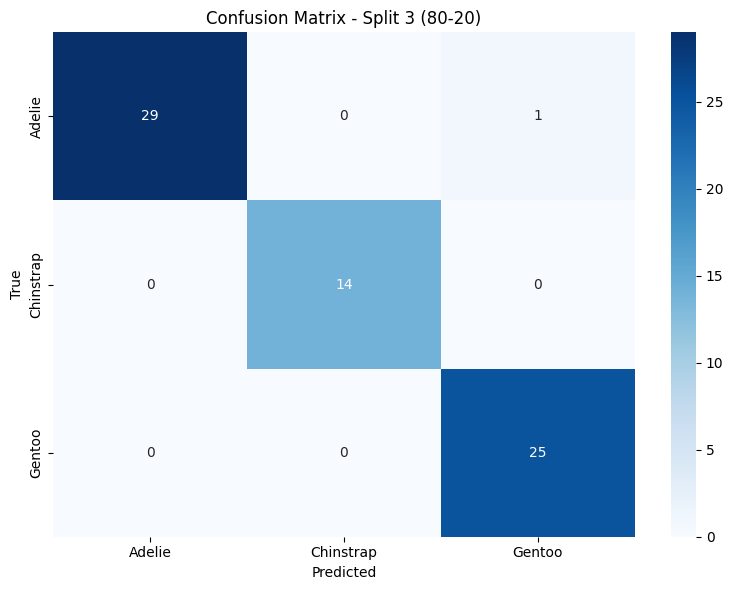


Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       0.96      1.00      0.98        25

    accuracy                           0.99        69
   macro avg       0.99      0.99      0.99        69
weighted avg       0.99      0.99      0.99        69


Evaluating model trained on split 4 (90-10):
Test Accuracy: 1.0000


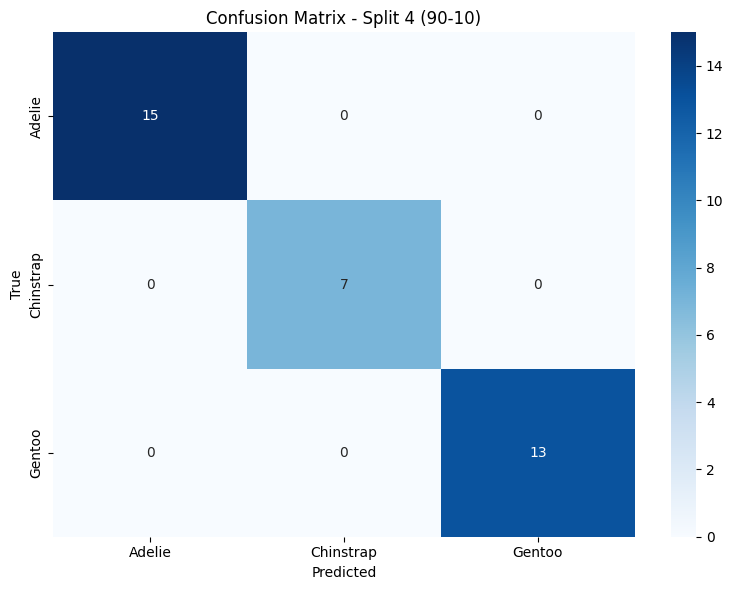


Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        15
   Chinstrap       1.00      1.00      1.00         7
      Gentoo       1.00      1.00      1.00        13

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



In [9]:
# Evaluate each model
evaluation_results = []

for i, ((X_train, X_test, y_train, y_test), model) in enumerate(zip(splits, models)):
    print(f"\nEvaluating model trained on split {i+1} ({split_ratios[i]}):")
    
    # Evaluate on test set
    result = evaluate_model(model, X_test, y_test, i+1)
    evaluation_results.append(result)
    
    print(f"Test Accuracy: {result['accuracy']:.4f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(result['matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=sorted(y.unique()),
                yticklabels=sorted(y.unique()))
    plt.title(f"Confusion Matrix - Split {i+1} ({split_ratios[i]})")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.savefig(f"../results/confusion_matrices/confusion_matrix_split_{i+1}.png")
    plt.show()
    
    # Print the classification report
    print("\nClassification Report:")
    print(result['report'])

## Step 6: Analyze the Effect of Tree Depth

In [10]:
# Use the 80/20 split (index 2) for depth analysis
X_train, X_test, y_train, y_test = splits[2]
depths = [None, 2, 3, 4, 5, 6, 7]

# Analyze performance across different depths
depth_results = analyze_tree_depth(X_train, X_test, y_train, y_test, depths)

# Display results
print("Accuracy by Tree Depth:")
print(depth_results)

Accuracy by Tree Depth:
   max_depth  accuracy
0  Unlimited  0.985507
1          2  0.971014
2          3  0.971014
3          4  0.985507
4          5  0.985507
5          6  0.985507
6          7  0.985507


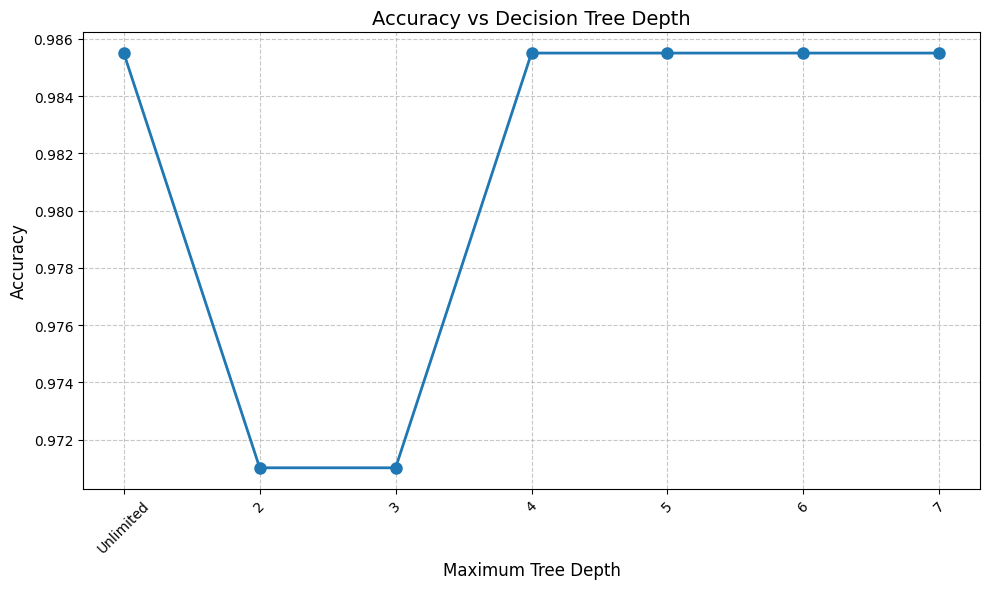

In [12]:
# Plot the accuracy vs depth
plt.figure(figsize=(10, 6))
# Chuyển đổi cột max_depth sang dạng string để tránh lỗi
depth_labels = [str(d) for d in depth_results['max_depth']]
plt.plot(depth_labels, depth_results['accuracy'], marker='o', linestyle='-', linewidth=2, markersize=8)
plt.title("Accuracy vs Decision Tree Depth", fontsize=14)
plt.xlabel("Maximum Tree Depth", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../visualizations/palmer_penguins/accuracy_vs_depth.png", dpi=300)
plt.show()

## Visualize the Decision Tree

Visualizing decision tree with depth=None


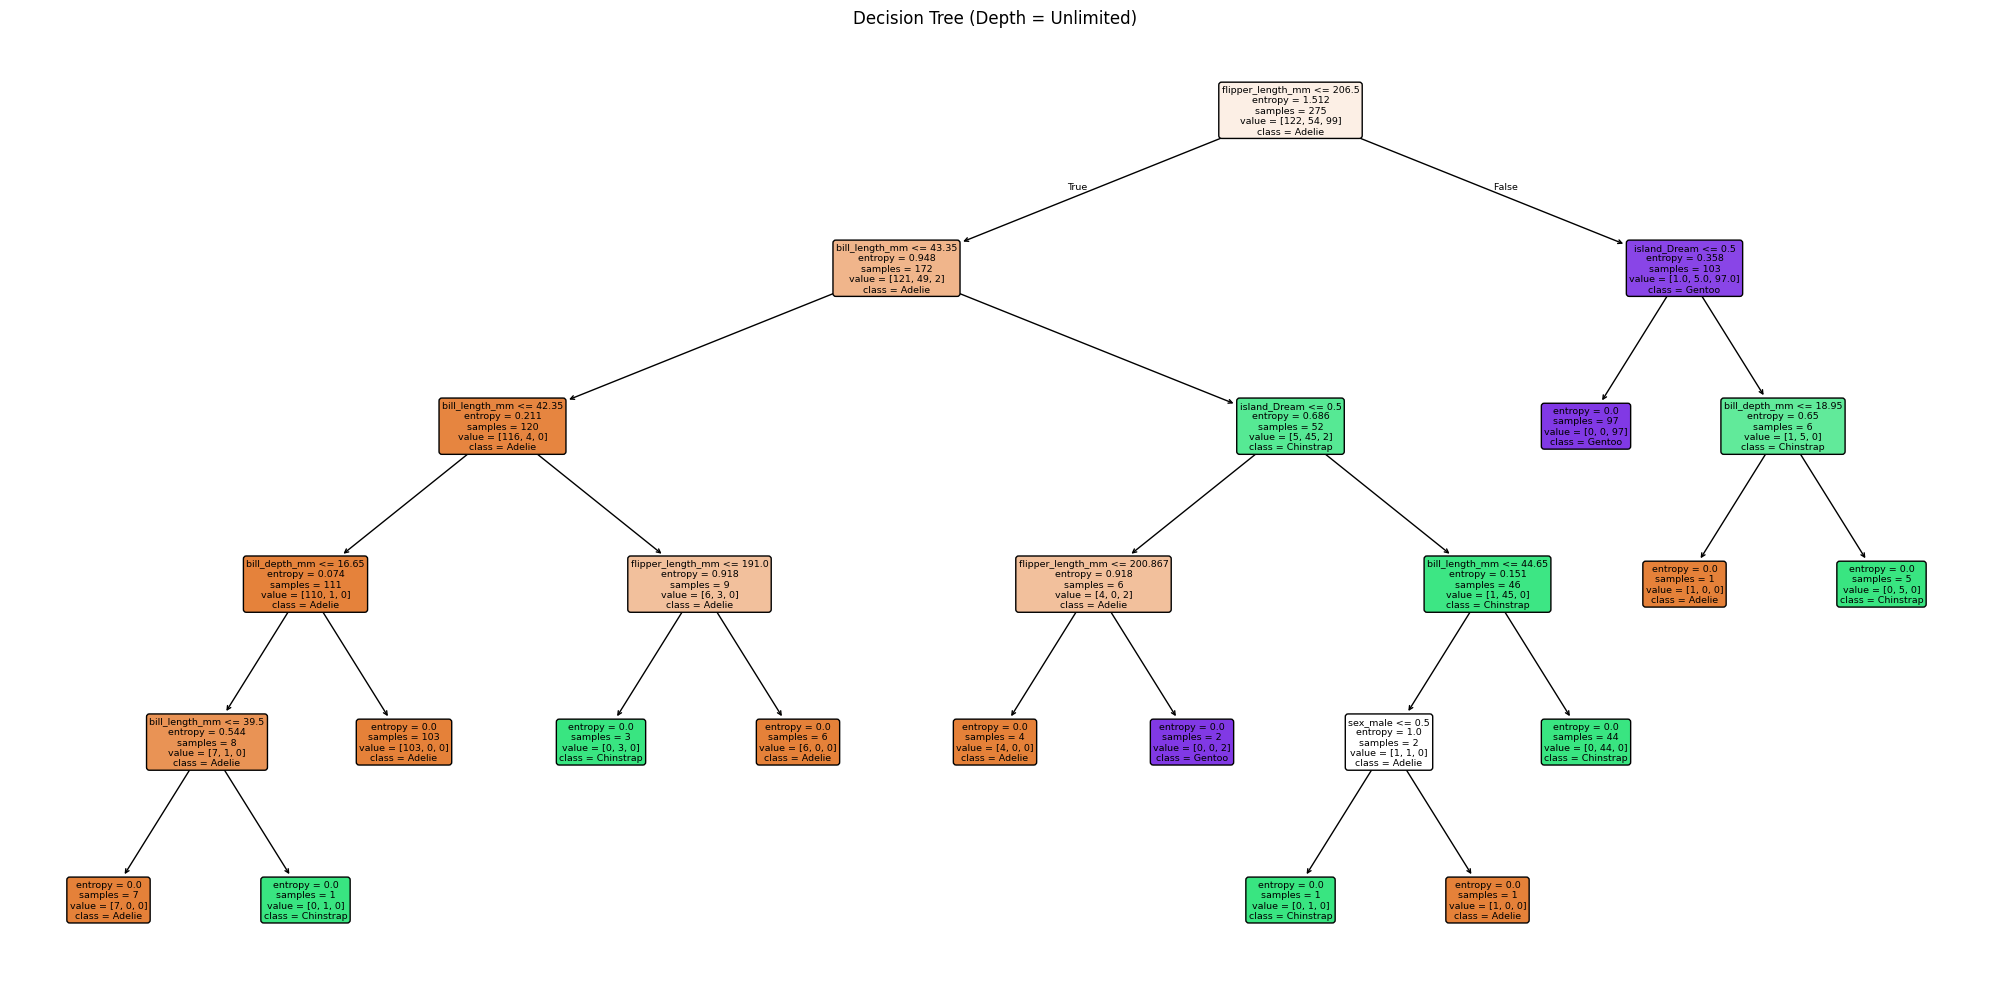

In [13]:
# Visualize the best tree model
# Find the best depth based on our analysis
best_depth_idx = depth_results['accuracy'].argmax()
best_depth = depths[best_depth_idx]

# Train a model with the best depth
best_model = train_decision_tree(X_train, y_train, depth=best_depth)

# Get feature names and class names
feature_names = X.columns.tolist()
class_names = sorted(y.unique().tolist())

print(f"Visualizing decision tree with depth={best_depth}")

# Visualize the tree
visualize_tree(best_model, feature_names, class_names, 
               output_path="../visualizations/palmer_penguins/decision_tree.png")

# Display the tree in the notebook
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.title(f"Decision Tree (Depth = {'Unlimited' if best_depth is None else best_depth})")
plt.tight_layout()
plt.show()

## Summary of Results

In [14]:
# Create a summary table of results from different splits
summary_data = {
    'Split Ratio': split_ratios,
    'Training Samples': [X_train.shape[0] for X_train, _, _, _ in splits],
    'Test Samples': [X_test.shape[0] for _, X_test, _, _ in splits],
    'Accuracy': [result['accuracy'] for result in evaluation_results]
}

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv("../results/accuracy_tables/summary_results.csv", index=False)

print("Summary of Results:")
print(summary_df)

Summary of Results:
  Split Ratio  Training Samples  Test Samples  Accuracy
0       40-60               137           207  0.951691
1       60-40               206           138  0.978261
2       80-20               275            69  0.985507
3       90-10               309            35  1.000000


## Feature Descriptions:
- bill_length_mm: Length of penguin's bill in millimeters
- bill_depth_mm: Depth of penguin's bill in millimeters
- flipper_length_mm: Length of penguin's flipper in millimeters
- body_mass_g: Body mass in grams
- sex_male: Gender (True=Male, False=Female)
- island_Dream, island_Torgersen: Island location (one-hot encoded)

## Conclusion

In this notebook, we've analyzed the Palmer Penguins dataset using decision trees to predict penguin species based on their physical characteristics. Our analysis included:

1. Data preprocessing to handle missing values and encode categorical features
2. Creating multiple train/test splits with different ratios
3. Visualizing class distributions across splits
4. Training and evaluating decision tree models
5. Analyzing the effect of tree depth on model performance

Key findings:
- The impact of different train/test split ratios on model performance
- The optimal tree depth for balancing model complexity and performance
- Important features for distinguishing between penguin species

These results provide valuable insights into how decision trees can be used for species classification tasks based on physical measurements.

# Direct Implementation of Analysis

To ensure that the analysis can be completed without relying on external utilities, let's implement the analysis directly in the notebook.

Step 1: Loading and preprocessing data...
Original dataset head:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  

Missing values:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

Processed features:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mas

C:\Users\khanh\AppData\Local\Temp\ipykernel_17008\1570448071.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].fillna(df['sex'].mode()[0], inplace=True)
C:\Users\khanh\AppData\Local\Temp\ipykernel_17008\1570448071.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axs[0], palette="viridis")
C:\Users\khanh\AppData\Local\Temp\ipykernel_17008\15704480

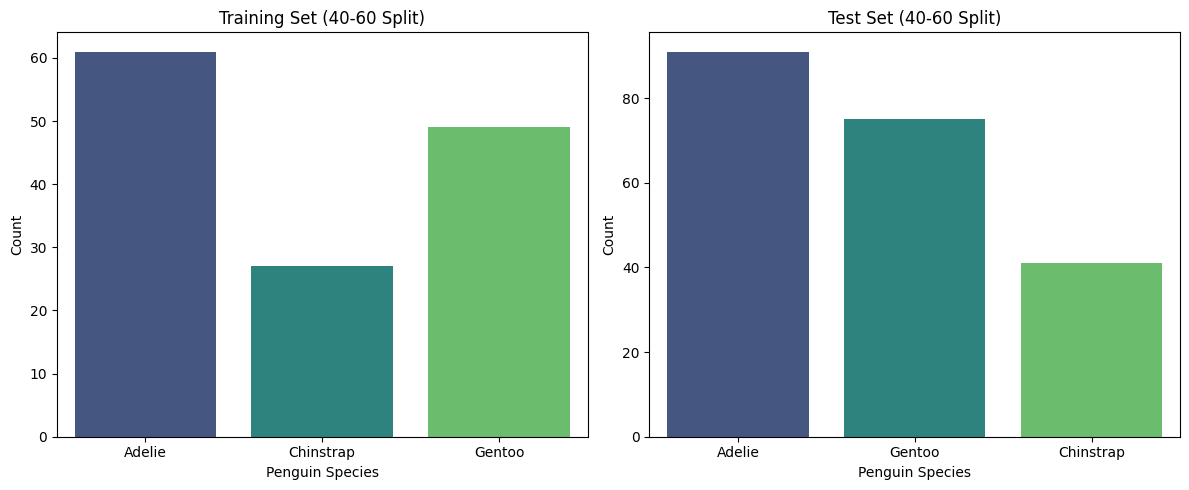

C:\Users\khanh\AppData\Local\Temp\ipykernel_17008\1570448071.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axs[0], palette="viridis")
C:\Users\khanh\AppData\Local\Temp\ipykernel_17008\1570448071.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, ax=axs[1], palette="viridis")


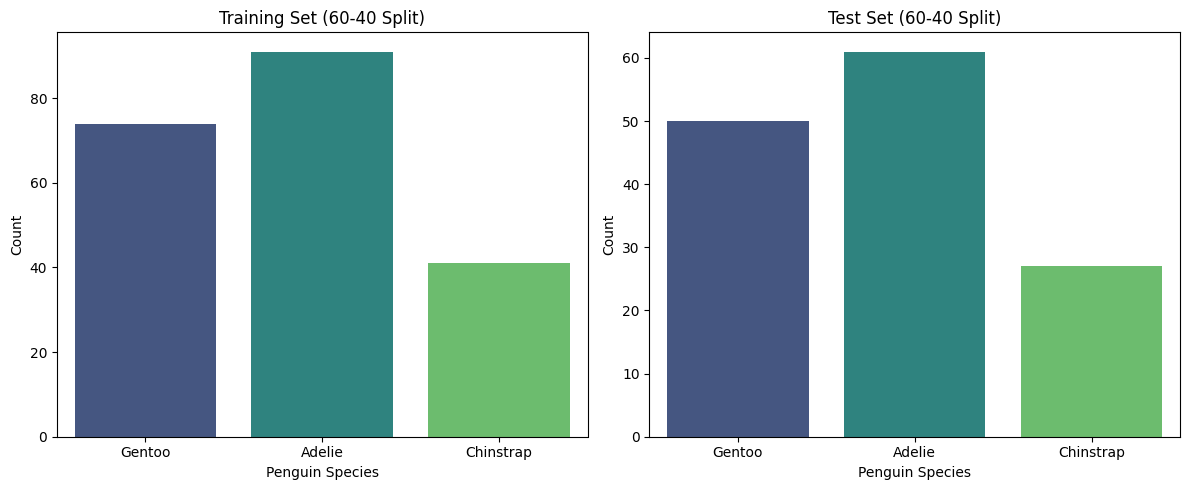

C:\Users\khanh\AppData\Local\Temp\ipykernel_17008\1570448071.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axs[0], palette="viridis")
C:\Users\khanh\AppData\Local\Temp\ipykernel_17008\1570448071.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, ax=axs[1], palette="viridis")


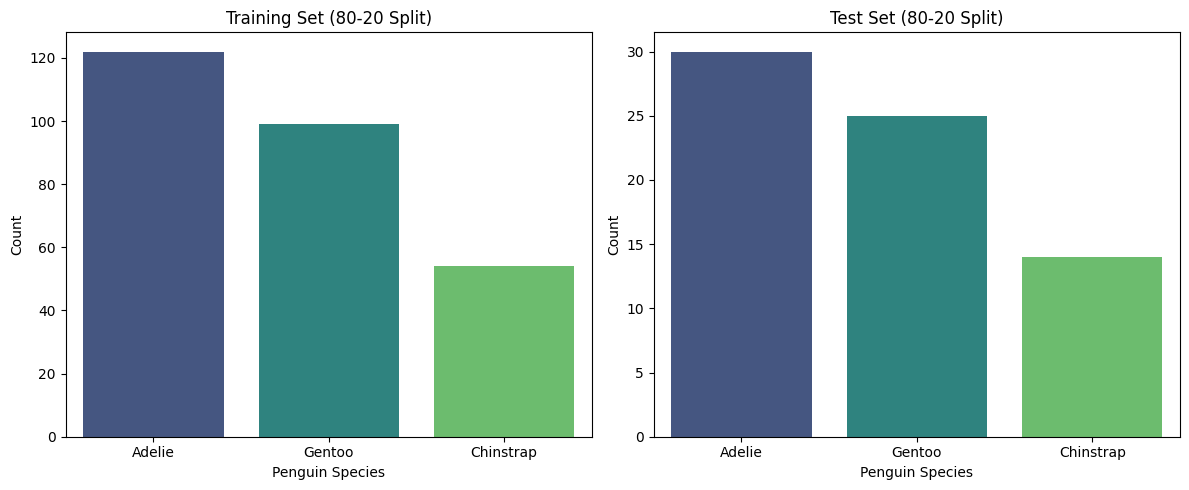

C:\Users\khanh\AppData\Local\Temp\ipykernel_17008\1570448071.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axs[0], palette="viridis")
C:\Users\khanh\AppData\Local\Temp\ipykernel_17008\1570448071.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, ax=axs[1], palette="viridis")


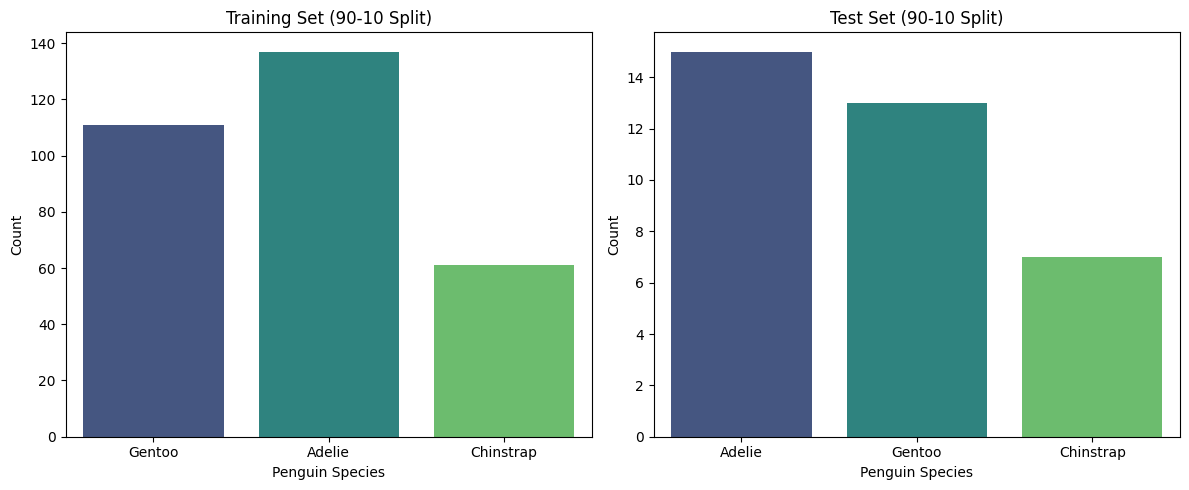


Step 4: Training decision tree models...
Training model on split 1 (40-60)...
Model trained with 13 nodes
Training model on split 2 (60-40)...
Model trained with 17 nodes
Training model on split 3 (80-20)...
Model trained with 25 nodes
Training model on split 4 (90-10)...
Model trained with 25 nodes

Step 5: Evaluating models...

Evaluating model trained on split 1 (40-60):
Test Accuracy: 0.9517

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.97      0.96      0.96        91
   Chinstrap       0.91      1.00      0.95        41
      Gentoo       0.96      0.92      0.94        75

    accuracy                           0.95       207
   macro avg       0.95      0.96      0.95       207
weighted avg       0.95      0.95      0.95       207



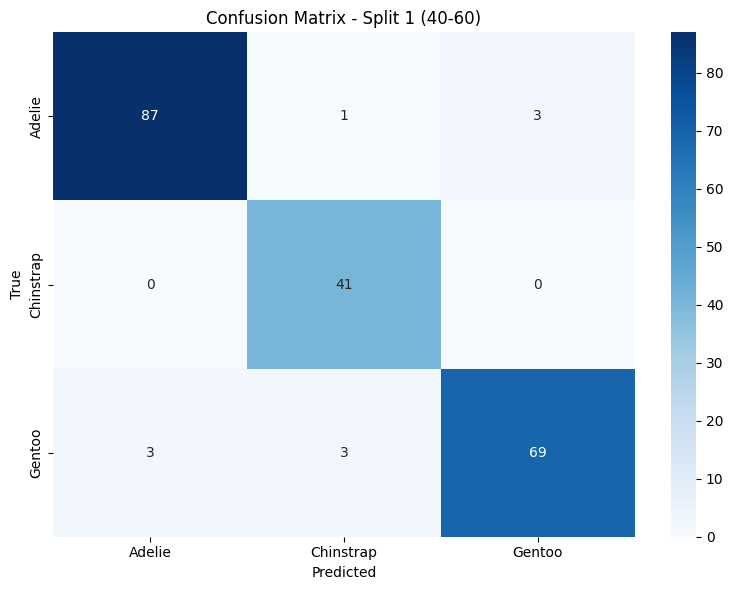


Evaluating model trained on split 2 (60-40):
Test Accuracy: 0.9783

Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      0.95      0.97        61
   Chinstrap       0.93      1.00      0.96        27
      Gentoo       0.98      1.00      0.99        50

    accuracy                           0.98       138
   macro avg       0.97      0.98      0.98       138
weighted avg       0.98      0.98      0.98       138



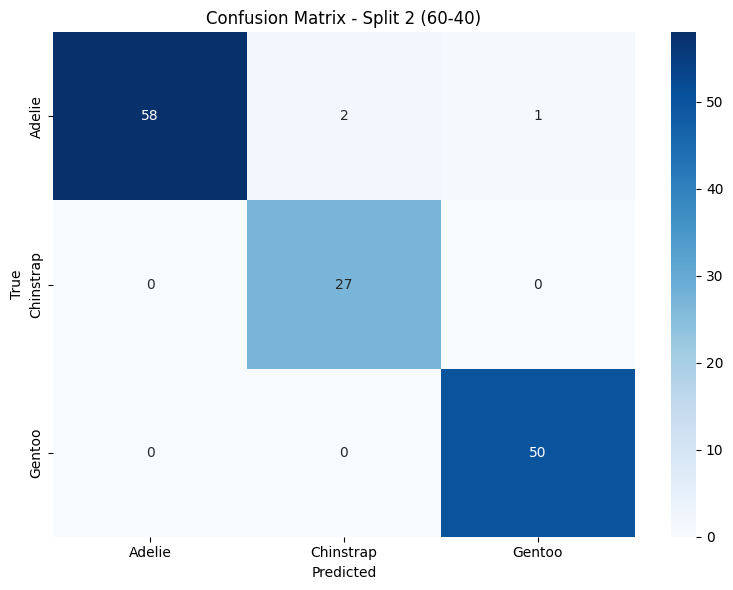


Evaluating model trained on split 3 (80-20):
Test Accuracy: 0.9855

Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       0.96      1.00      0.98        25

    accuracy                           0.99        69
   macro avg       0.99      0.99      0.99        69
weighted avg       0.99      0.99      0.99        69



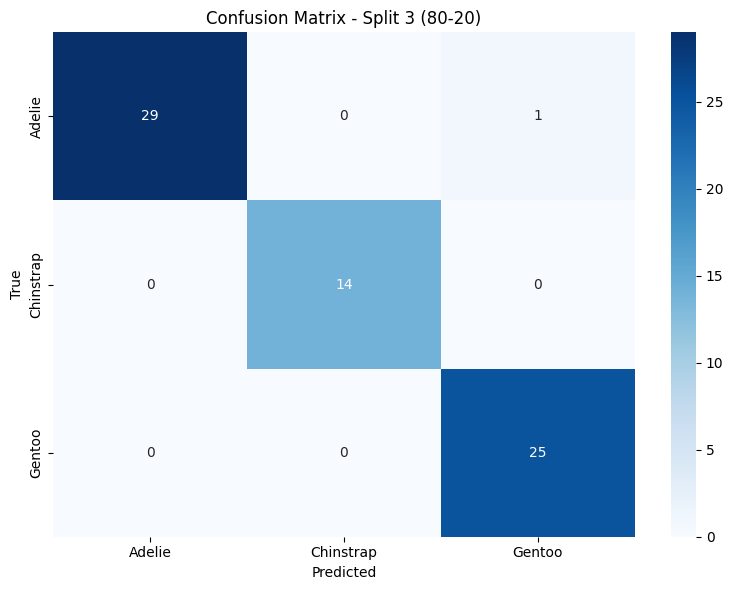


Evaluating model trained on split 4 (90-10):
Test Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        15
   Chinstrap       1.00      1.00      1.00         7
      Gentoo       1.00      1.00      1.00        13

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



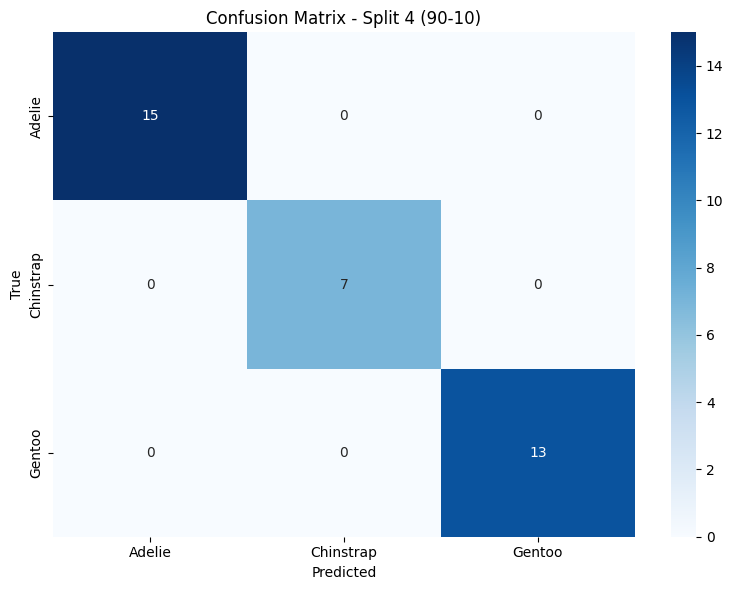


Step 6: Analyzing the effect of tree depth...
Training tree with depth = Unlimited...
Accuracy: 0.9855
Training tree with depth = 2...
Accuracy: 0.9710
Training tree with depth = 3...
Accuracy: 0.9710
Training tree with depth = 4...
Accuracy: 0.9855
Training tree with depth = 5...
Accuracy: 0.9855
Training tree with depth = 6...
Accuracy: 0.9855
Training tree with depth = 7...
Accuracy: 0.9855


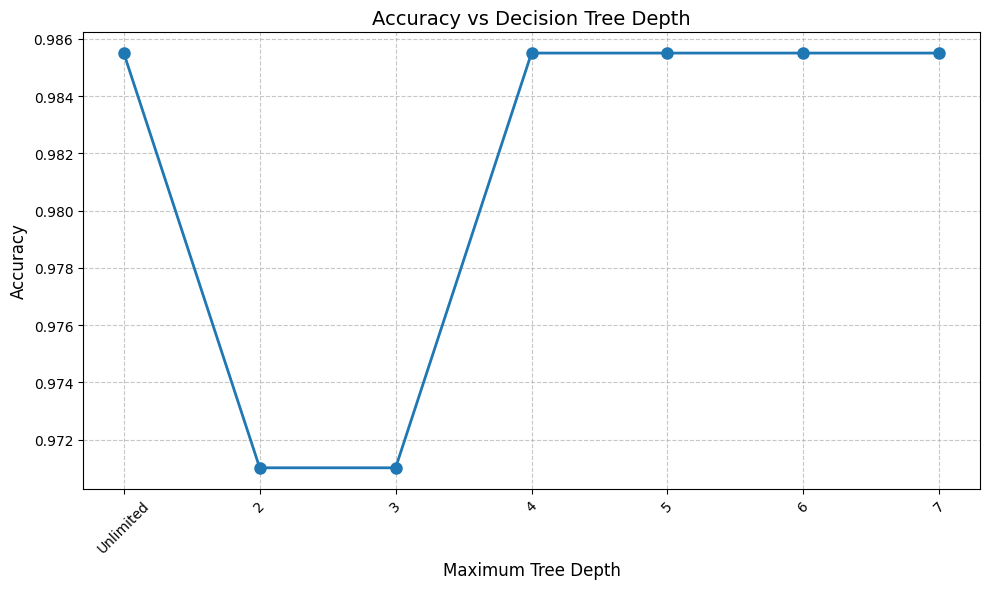


Best tree depth: Unlimited with accuracy 0.9855


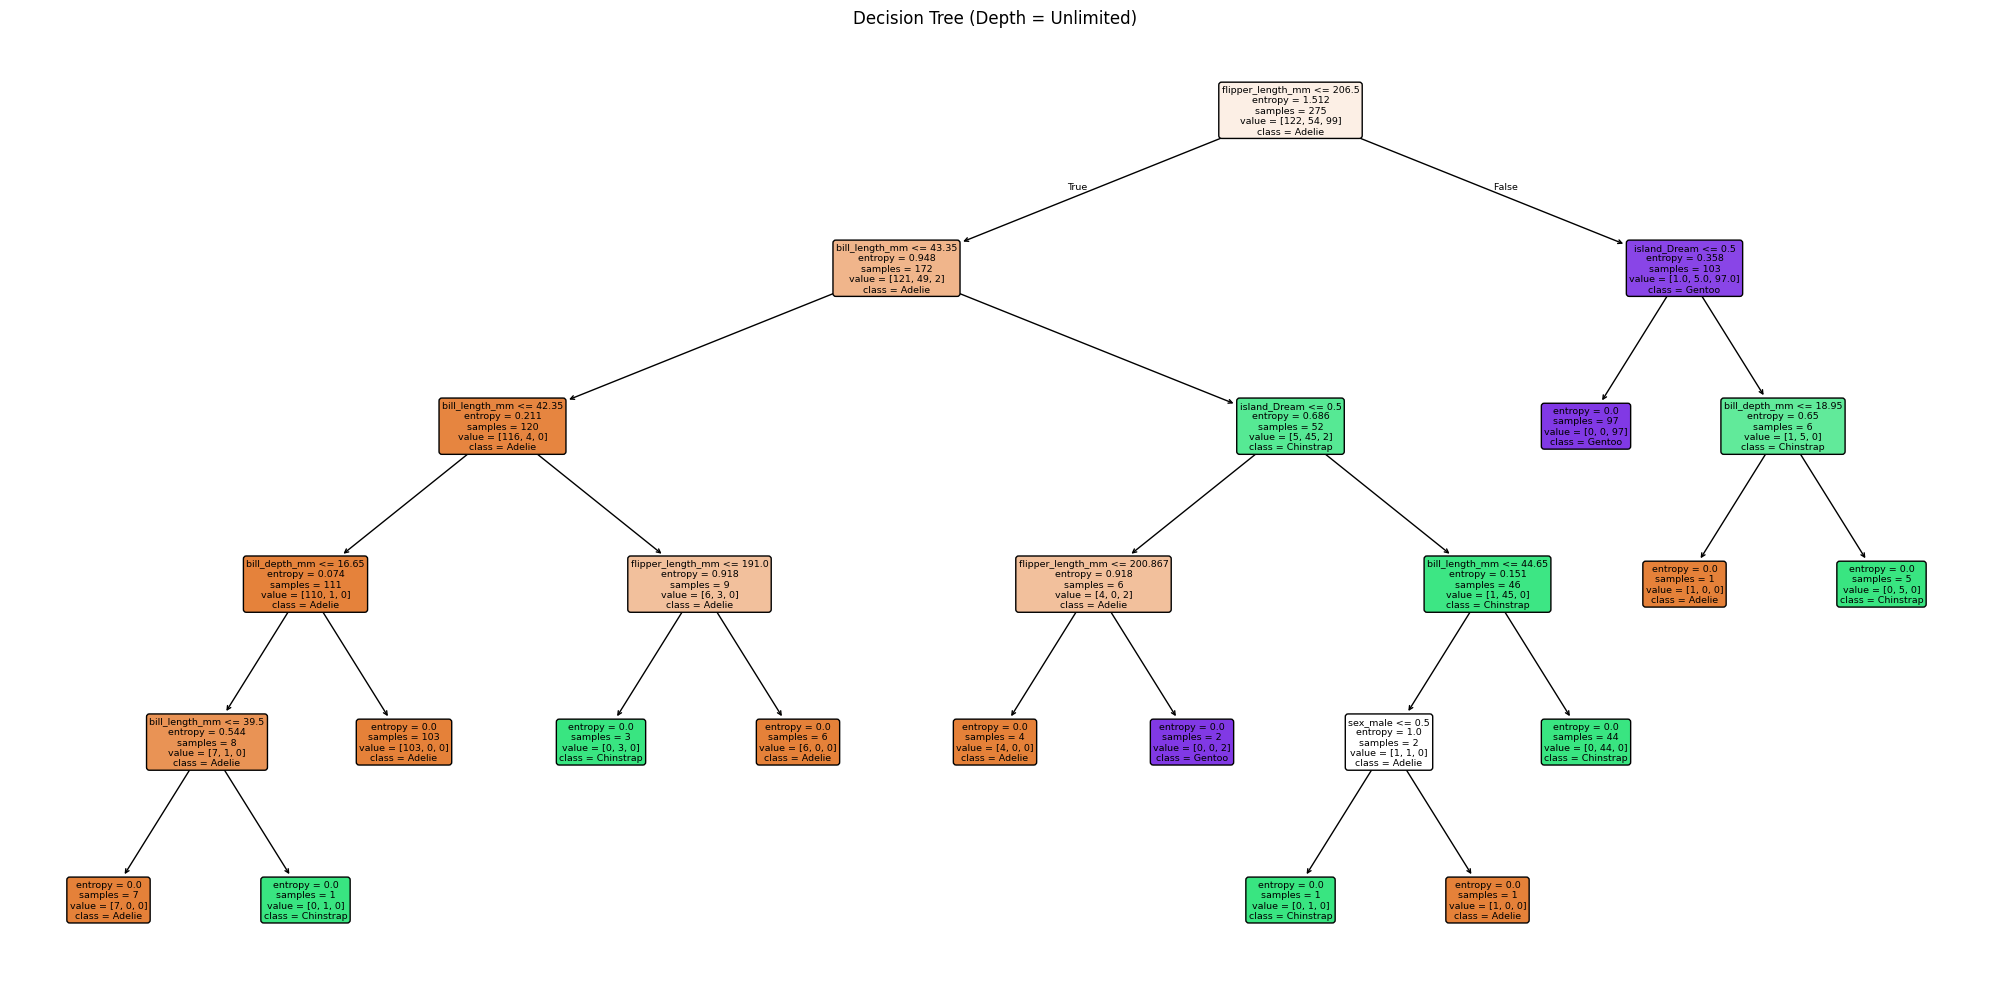


Summary of Results:
  Split Ratio  Training Samples  Test Samples  Accuracy
0       40-60               137           207  0.951691
1       60-40               206           138  0.978261
2       80-20               275            69  0.985507
3       90-10               309            35  1.000000

Analysis completed successfully!


In [1]:
# Complete implementation of Palmer Penguins analysis
# This cell contains all necessary code to run the analysis without external dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create directories for output
os.makedirs("../visualizations/palmer_penguins", exist_ok=True)
os.makedirs("../results/accuracy_tables", exist_ok=True)
os.makedirs("../results/classification_reports", exist_ok=True)
os.makedirs("../results/confusion_matrices", exist_ok=True)

# Step 1: Load and preprocess data
print("Step 1: Loading and preprocessing data...")
data_path = "../datasets/palmer_penguins/penguins.csv"
df = pd.read_csv(data_path)

# Display original data
print("Original dataset head:")
print(df.head())
print("\nMissing values:")
print(df.isnull().sum())

# Impute numeric columns
numeric_cols = df.select_dtypes(include='number').columns
imputer = IterativeImputer(random_state=42, max_iter=10)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Fill missing categorical values
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

# One-hot encoding
df = pd.get_dummies(df, columns=['sex', 'island'], drop_first=True)

# Separate features and target
X = df.drop('species', axis=1)
y = df['species']

print("\nProcessed features:")
print(X.head())
print("\nTarget distribution:")
print(y.value_counts())

# Step 2: Create multiple train/test splits
print("\nStep 2: Creating multiple train/test splits...")
split_ratios = ["40-60", "60-40", "80-20", "90-10"]
ratio_values = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
splits = []

for train_size, _ in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, stratify=y, random_state=42)
    splits.append((X_train, X_test, y_train, y_test))

print(f"Created {len(splits)} different train/test splits with ratios: {', '.join(split_ratios)}")

for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    print(f"Split {i+1} ({split_ratios[i]}):")
    print(f"  Training set: {X_train.shape[0]} samples")
    print(f"  Test set: {X_test.shape[0]} samples")

# Step 3: Visualize class distribution for each split
print("\nStep 3: Visualizing class distribution...")

for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    # Train set distribution
    sns.countplot(x=y_train, ax=axs[0], palette="viridis")
    axs[0].set_title(f"Training Set ({split_ratios[i]} Split)")
    axs[0].set_xlabel("Penguin Species")
    axs[0].set_ylabel("Count")
    
    # Test set distribution
    sns.countplot(x=y_test, ax=axs[1], palette="viridis")
    axs[1].set_title(f"Test Set ({split_ratios[i]} Split)")
    axs[1].set_xlabel("Penguin Species")
    axs[1].set_ylabel("Count")
    
    plt.tight_layout()
    plt.savefig(f"../visualizations/palmer_penguins/class_distribution_split_{i+1}.png")
    plt.show()

# Step 4: Train decision tree models
print("\nStep 4: Training decision tree models...")
models = []

for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    print(f"Training model on split {i+1} ({split_ratios[i]})...")
    model = DecisionTreeClassifier(criterion='entropy', random_state=42)
    model.fit(X_train, y_train)
    models.append(model)
    print(f"Model trained with {model.tree_.node_count} nodes")

# Step 5: Evaluate models
print("\nStep 5: Evaluating models...")
evaluation_results = []

for i, ((X_train, X_test, y_train, y_test), model) in enumerate(zip(splits, models)):
    print(f"\nEvaluating model trained on split {i+1} ({split_ratios[i]}):")
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {accuracy:.4f}")
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(report)
    
    # Generate confusion matrix
    matrix = confusion_matrix(y_test, y_pred)
    
    # Save results
    with open(f"../results/classification_reports/report_split_{i+1}.txt", "w") as f:
        f.write(report + "\n")
        f.write("Confusion Matrix:\n" + np.array2string(matrix))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=sorted(y.unique()),
                yticklabels=sorted(y.unique()))
    plt.title(f"Confusion Matrix - Split {i+1} ({split_ratios[i]})")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.savefig(f"../results/confusion_matrices/confusion_matrix_split_{i+1}.png")
    plt.show()
    
    # Store results
    evaluation_results.append({
        "accuracy": accuracy,
        "report": report,
        "matrix": matrix
    })

# Step 6: Analyze the effect of tree depth
print("\nStep 6: Analyzing the effect of tree depth...")
# Use the 80/20 split (index 2) for depth analysis
X_train, X_test, y_train, y_test = splits[2]
depths = [None, 2, 3, 4, 5, 6, 7]
depth_labels = ['Unlimited' if d is None else str(d) for d in depths]
accuracy_values = []

for d in depths:
    print(f"Training tree with depth = {d if d is not None else 'Unlimited'}...")
    model = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    print(f"Accuracy: {accuracy:.4f}")

# Save results to CSV
depth_results_df = pd.DataFrame({
    'max_depth': depth_labels,
    'accuracy': accuracy_values
})
os.makedirs("../results/accuracy_tables", exist_ok=True)
depth_results_df.to_csv("../results/accuracy_tables/accuracy_by_depth.csv", index=False)

# Plot accuracy vs depth
plt.figure(figsize=(10, 6))
plt.plot(depth_labels, accuracy_values, marker='o', linestyle='-', linewidth=2, markersize=8)
plt.title("Accuracy vs Decision Tree Depth", fontsize=14)
plt.xlabel("Maximum Tree Depth", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../visualizations/palmer_penguins/accuracy_vs_depth.png", dpi=300)
plt.show()

# Visualize the best tree
best_idx = np.argmax(accuracy_values)
best_depth = depths[best_idx]
print(f"\nBest tree depth: {best_depth if best_depth is not None else 'Unlimited'} with accuracy {accuracy_values[best_idx]:.4f}")

best_model = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth, random_state=42)
best_model.fit(X_train, y_train)

# Get feature names and class names
feature_names = X.columns.tolist()
class_names = sorted(y.unique().tolist())

# Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.title(f"Decision Tree (Depth = {'Unlimited' if best_depth is None else best_depth})")
plt.tight_layout()
plt.savefig("../visualizations/palmer_penguins/decision_tree.png", dpi=300)
plt.show()

# Create summary table
summary_data = {
    'Split Ratio': split_ratios,
    'Training Samples': [X_train.shape[0] for X_train, _, _, _ in splits],
    'Test Samples': [X_test.shape[0] for _, X_test, _, _ in splits],
    'Accuracy': [result['accuracy'] for result in evaluation_results]
}

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv("../results/accuracy_tables/summary_results.csv", index=False)

print("\nSummary of Results:")
print(summary_df)

print("\nAnalysis completed successfully!")